<a href="https://colab.research.google.com/github/artbrgn/DS-Unit-2-Applied-Modeling/blob/master/module2/Arturo_Obregon_of_assignment_applied_modeling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [ ] Determine whether your problem is regression or classification.
- [ ] Choose your evaluation metric.
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" information from the future?


In [0]:
pip install --upgrade category_encoders

     |████████████████████████████████| 102kB 4.5MB/s 


In [0]:
%%capture
import sys


import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [0]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv


In [61]:
gender = pd.read_csv('gender_submission.csv')
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [62]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [63]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
train.shape, test.shape


((891, 12), (418, 11))

In [65]:
train, val = train_test_split(train, random_state=42)
train.shape, val.shape

((668, 12), (223, 12))

In [0]:
train = train.dropna()

In [69]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [0]:
val = val.dropna()

In [71]:
val.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [0]:
test = test.dropna()

In [73]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [0]:
target = 'Survived'
X_train = train.drop(columns=[target])
y_train = train[target]
X_test = val.drop(columns=[target])
y_test = val[target]

In [75]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=250, random_state=42, n_jobs=-1)
)

X_train_transformed = pipeline.fit(X_train, y_train)
# X_test_transformed = pipeline.transform(X_test)

# model = 
# model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)

print('Test Accuracy', accuracy_score(X_val, y_val))

TypeError: ignored

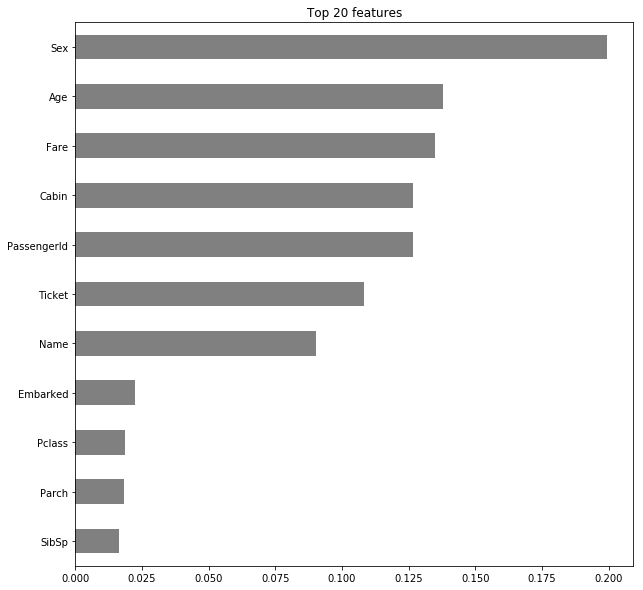

In [76]:
from sklearn.pipeline import Pipeline

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [77]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_test_transformed, y_test)

ModuleNotFoundError: ignored

In [79]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names)

NameError: ignored

In [80]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

X_train.shape, X_test.shape, X_train_encoded.shape, X_test_encoded.shape

((134, 11), (49, 11), (134, 11), (49, 11))

In [81]:
# XGBoost
from xgboost import XGBClassifier

eval_set = [(X_train_encoded, y_train), 
            (X_test_encoded, y_test)]

model = XGBClassifier(
    n_estimators=1000, # <= 1000 trees, depends on early stopping
    max_depth=7,       # try deeper trees because of high cardinality categoricals
    learning_rate=0.3, # try higher learning rate
    n_jobs=-1
)

model.fit(X_train_encoded, y_train, eval_set=eval_set, 
          eval_metric='error', early_stopping_rounds=50)

[0]	validation_0-error:0.074627	validation_1-error:0.244898
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.074627	validation_1-error:0.244898
[2]	validation_0-error:0.052239	validation_1-error:0.22449
[3]	validation_0-error:0.067164	validation_1-error:0.22449
[4]	validation_0-error:0.067164	validation_1-error:0.22449
[5]	validation_0-error:0.037313	validation_1-error:0.22449
[6]	validation_0-error:0.029851	validation_1-error:0.326531
[7]	validation_0-error:0.037313	validation_1-error:0.346939
[8]	validation_0-error:0.029851	validation_1-error:0.346939
[9]	validation_0-error:0.022388	validation_1-error:0.346939
[10]	validation_0-error:0.014925	validation_1-error:0.326531
[11]	validation_0-error:0.022388	validation_1-error:0.326531
[12]	validation_0-error:0.014925	validation_1-error:0.326531
[13]	validation_0-error:0.014925	validation_1-error:0.306122

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

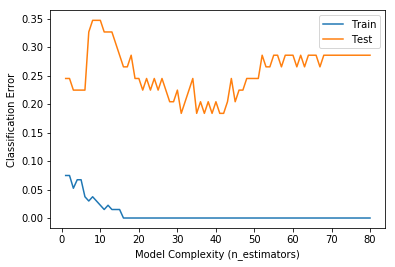

In [82]:
import matplotlib.pyplot as plt

results = model.evals_result()
train_error = results['validation_0']['error']
test_error = results['validation_1']['error']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, test_error, label='Test')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.legend();

In [83]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Name', 'Sex', 'Ticket', 'Cabin',
                                      'Embarked'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Name',
                                          'data_type': dtype('O'),
                                          'mapping': Allison, Master. Hudson Trevor                             1
Ryerson, Miss. Susan Parker "Suzette"                      2
Peuchen, Major. Arthur Godfrey                             3
Navratil, Mr. Michel ("Louis M Ho...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
           

In [84]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_test)
print('Validation Accuracy', accuracy_score(y_test, y_pred))

Validation Accuracy 0.7959183673469388
